# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [56]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [57]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/W207/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

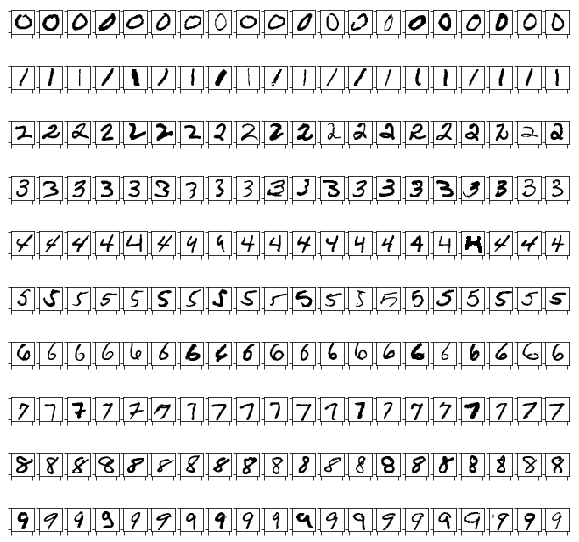

In [58]:
def P1(num_examples=10):
    numlist = list()
    figure = plt.figure(figsize=(10,10))
    for i in range(10):
        numlist.append(X[Y==i])
    for num in range(10):
        ax = list()
        for i in range(num_examples):
            ax.append(plt.subplot2grid((10,num_examples),(num,i),rowspan=1,colspan=1))
            grid_data = numlist[num][i].reshape(28,28)
            ax[i].imshow(grid_data,interpolation="none",cmap="binary")
            ax[i].set_xticklabels([])
            ax[i].set_yticklabels([])
    plt.show()

P1(20)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [59]:
clf_report = list()
def P2(k_values):
    for i in k_values:
        p2_knn = KNeighborsClassifier(n_neighbors=i)
        p2_knn.fit(mini_train_data, mini_train_labels)
        pred_knn = p2_knn.predict(dev_data)
        clf_report.append(classification_report(dev_labels,pred_knn))
        acc_score = np.mean(pred_knn==dev_labels)
        print("Accuracy score for k={} is {}".format(i,acc_score))

k_values = [1, 3, 5, 7, 9]
P2(k_values)
print("For K=1, printing the classification report")
print(clf_report[0])

Accuracy score for k=1 is 0.888
Accuracy score for k=3 is 0.878
Accuracy score for k=5 is 0.869
Accuracy score for k=7 is 0.865
Accuracy score for k=9 is 0.863
For K=1, printing the classification report
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000



<font color=blue> ANSWER: If we take F-Score as basis, then the most difficult digit to classify is 9 based on the mini training data. If we take precision into account, the most difficult digit to classify is '3'.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [60]:
def P3(train_sizes, accuracies):
    for i in train_sizes:
        t0 = time.time()
        tn_data, tn_labels = X[:i], Y[:i]
        p3_knn = KNeighborsClassifier(n_neighbors=1)
        p3_knn.fit(tn_data, tn_labels)
        pred_knn = p3_knn.predict(dev_data)
        t1 = time.time()
        print("Time taken for predicting with training data size : {} is {} seconds".format(i,t1-t0))
        accuracy = np.mean(pred_knn==dev_labels)
        accuracies.append(accuracy)
        print("Accuracy for training data size : {} is {}".format(i,accuracy))


train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

Time taken for predicting with training data size : 100 is 0.1114950180053711 seconds
Accuracy for training data size : 100 is 0.72
Time taken for predicting with training data size : 200 is 0.23372817039489746 seconds
Accuracy for training data size : 200 is 0.786
Time taken for predicting with training data size : 400 is 0.4603719711303711 seconds
Accuracy for training data size : 400 is 0.841
Time taken for predicting with training data size : 800 is 0.8957502841949463 seconds
Accuracy for training data size : 800 is 0.884
Time taken for predicting with training data size : 1600 is 1.883133888244629 seconds
Accuracy for training data size : 1600 is 0.902
Time taken for predicting with training data size : 3200 is 3.7563939094543457 seconds
Accuracy for training data size : 3200 is 0.926
Time taken for predicting with training data size : 6400 is 7.671890735626221 seconds
Accuracy for training data size : 6400 is 0.937
Time taken for predicting with training data size : 12800 is 15.0

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [61]:
import pandas as pd
train_array = pd.DataFrame(train_sizes)
train_array.columns = ['train_size']
acc_array = np.asarray(accuracies)
def P4(tn_size):
    lm = LinearRegression()
    lm.fit(train_array, acc_array)
    lm_pred = lm.predict(tn_size)
    print("Coefficients:",lm.coef_)
    print(lm_pred)

P4(60000)

Coefficients: [  6.66527139e-06]
[ 1.24307226]


<font color=blue> ANSWER: For 60000, the prediction for accuracy goes more than 1.

In [63]:
# Transforming the values for better prediction
# Since the estimation exceeds the maximum accuracy, we need to use sigmoid to transform accuracy

# Transform the accuracy array using sigmoid function x/1-x
acc_t = acc_array/(1-acc_array)

def P4_mod(tn_size):
    lm2 = LinearRegression()
    lm2.fit(train_array, acc_t)
    lm2_pred = lm2.predict(tn_size)
    # Convert the transformed accuracy back to normal
    lm2_pred = lm2_pred/(1+lm2_pred)
    print("Coefficients:",lm2.coef_)
    print(lm2_pred)

P4_mod(60000)

Coefficients: [ 0.00114522]
[ 0.98678522]


Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

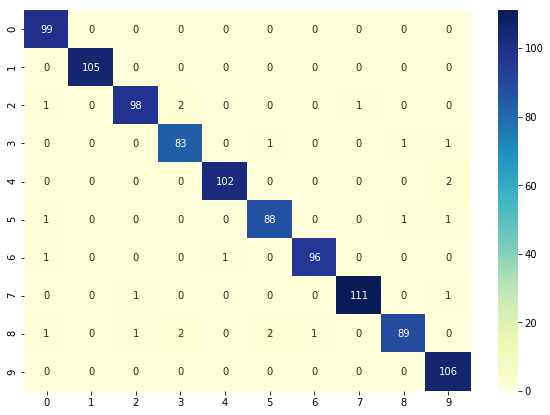

In [64]:
# In this exercise, we are using full train data set than the mini train data set
# Importing seaborn for better graphical display of confusion matrix

import seaborn as sn

def P5():
    p5_knn = KNeighborsClassifier(n_neighbors=1)
    p5_knn.fit(train_data, train_labels)
    pred_knn = p5_knn.predict(dev_data)
    cnf = confusion_matrix(dev_labels, pred_knn)
    df_cm = pd.DataFrame(cnf, index = [i for i in range(10)],
                  columns = [i for i in range(10)])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True,cmap="YlGnBu",fmt='g')
    return(pred_knn)

pred_knn = P5()


In [65]:
# First let us store all the incorrectly predicted values and labels into a data frame
wrong_data = list()
actual_label = list()
wrong_label = list()
for data,pred_label,right_label in zip(dev_data,pred_knn,dev_labels):
    if pred_label!=right_label:
        wrong_data.append(data)
        wrong_label.append(pred_label)
        actual_label.append(right_label)
df_pred = pd.DataFrame()
df_pred['Actual Label'] = actual_label
df_pred['Wrong Label'] = wrong_label
df_pred['Wrong Data'] = wrong_data


<font color=blue> Printing 8 that has highest number of wrong predictions. We will print all the confused values of 8 from confusion matrix. The incorrect prediction is labeled at the bottom of the image.

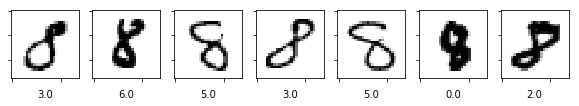

In [74]:
# Let us take value 8 which has highest number of wrong predictions

figure = plt.figure(figsize=(10,10))
df8 = df_pred[df_pred['Actual Label']==8]
wrong_pred_number_8 = df8['Actual Label'].count()
df8.reindex(range(wrong_pred_number_8))

ax8 = list()
for i in range(wrong_pred_number_8):
    ax8.append(plt.subplot2grid((1,wrong_pred_number_8),(0,i),rowspan=1,colspan=1))
    grid_data = df8.iloc[i]['Wrong Data'].reshape(28,28)
    ax8[i].imshow(grid_data,interpolation="none",cmap="binary")
    ax8[i].set_xticklabels([])
    ax8[i].set_yticklabels([])
    ax8[i].set_xlabel(df8.iloc[i]['Wrong Label'])

# The plot will show the value 8 being predicted incorrectly. xlabel below shows the value our algorithm predicted.
plt.show()

<font color=blue> Printing 2 that has the next highest number of wrong predictions. We will print all the confused values of 2 from confusion matrix. The incorrect prediction is labeled at the bottom of the image.

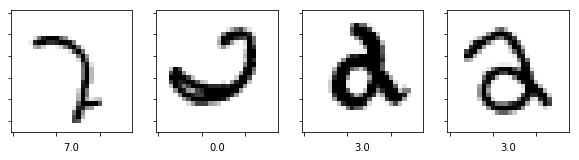

In [66]:
# Let us take value 2 which has the next highest number of wrong predictions

figure = plt.figure(figsize=(10,10))
df2 = df_pred[df_pred['Actual Label']==2]
wrong_pred_number_2 = df2['Actual Label'].count()
df2.reindex(range(wrong_pred_number_2))

ax2 = list()
for i in range(wrong_pred_number_2):
    ax2.append(plt.subplot2grid((1,wrong_pred_number_2),(0,i),rowspan=1,colspan=1))
    grid_data = df2.iloc[i]['Wrong Data'].reshape(28,28)
    ax2[i].imshow(grid_data,interpolation="none",cmap="binary")
    ax2[i].set_xticklabels([])
    ax2[i].set_yticklabels([])
    ax2[i].set_xlabel(df2.iloc[i]['Wrong Label'])

# The plot will show the value 2 being predicted incorrectly. xlabel below shows the value our algorithm predicted.
plt.show()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [69]:
import copy

def blur_image(new_data,given_data):
    """ Function to blur the pixels for better accuracy """
    for image_data,true_data in zip(new_data,given_data):
        image_data = image_data.reshape(28,28)
        true_data = true_data.reshape(28,28)
        for i in range(28):
            # Do not blur the border pixels as they contain no useful information
            if i in (0,27):
                continue
            else:
                for j in range(28):
                    if j in (0,27):
                        # Do not blur the border pixels as they contain no useful information
                        continue
                    else:
                        image_data[i,j] = np.mean(true_data[i-1:i+2,j-1:j+2])
                        
    return(new_data)

def apply_knn(knn_data,knn_labels,dev_data,dev_labels):
    """ Apply KNN=1 and return accuracy """
    p6_knn = KNeighborsClassifier(n_neighbors=1)
    p6_knn.fit(knn_data, knn_labels)
    pred_knn = p6_knn.predict(dev_data)
    accuracy = np.mean(pred_knn==dev_labels)
    return(accuracy)
    
def P6():
    
    # Measure the accuracy without any blur
    orig_accuracy = apply_knn(train_data,train_labels,dev_data,dev_labels)
    print("Original Accuracy without blurring any data is: {}".format(orig_accuracy))
    
    # Step 1 : Apply blur to train data but not the dev data
    blur_train_data = copy.deepcopy(train_data)
    blur_train_data = blur_image(blur_train_data,train_data)
    
    # Fit with 1-KNN and measure accuracy
    train_blur_accuracy = apply_knn(blur_train_data,train_labels,dev_data,dev_labels)
    print("Accuracy with blurring train data is: {}".format(train_blur_accuracy))
    
    # Step 2 : Apply blur to dev data but not to train data
    blur_dev_data = copy.deepcopy(dev_data)
    blur_dev_data = blur_image(blur_dev_data,dev_data)
    
    # Fit with 1-KNN and measure accuracy
    dev_blur_accuracy = apply_knn(train_data,train_labels,blur_dev_data,dev_labels)
    print("Accuracy with blurring Dev data is: {}".format(dev_blur_accuracy))    

    # Step 3 : Fit with 1-KNN on blurred dev and train data and measure accuracy
    
    both_blur_accuracy = apply_knn(blur_train_data,train_labels,blur_dev_data,dev_labels)
    print("Accuracy with blurring both dev and train data is: {}".format(dev_blur_accuracy))  

P6()

Original Accuracy without blurring any data is: 0.977
Accuracy with blurring train data is: 0.982
Accuracy with blurring Dev data is: 0.962
Accuracy with blurring both dev and train data is: 0.962


<font color=blue> ANSWER: From the above results, blurring train data improves accuracy. But if both train and dev data is blurred, the accuracy has decreased. The results might be different if the algorithm does padding at the edges than ignoring the edges.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [6]:
def multinomnb(given_data):
    """ Multinomial Function to set pixels to 0,1,2 based on the threshold"""
    for image_data in given_data:
        image_data[image_data<=0.25]=0
        image_data[(image_data>0.25)&(image_data<=0.75)]=1
        image_data[image_data>0.75]=2
    return given_data

def binomb(given_data):
    """ Binomial Function to set pixels to 0,1 based on the threshold"""
    for image_data in given_data:
        image_data[image_data<=0.5]=0
        image_data[image_data>0.5]=1
    return given_data

def P7():

    # Create a deep copy of train data
    #train_data_copy_bin = copy.deepcopy(train_data)
    #train_data_copy_bin = binomb(train_data_copy_bin)
    # First, let us check the BernouliNB by binarizing the values
    p7_bnb = BernoulliNB(binarize=0.5)
    p7_bnb.fit(train_data,train_labels)
    pred_bnb=p7_bnb.predict(dev_data)
    accuracy_bnb = np.mean(pred_bnb==dev_labels)
    print("Accuracy with BernoulliNB is: {}".format(accuracy_bnb))
    
    # Second step to check MultinomialNB
    # Create a deep copy of train data
    train_data_copy_multi = copy.deepcopy(train_data)
    train_data_copy_multi = multinomnb(train_data_copy_multi)
    
    p7_mnb = MultinomialNB()
    p7_mnb.fit(train_data_copy_multi,train_labels)
    pred_mnb=p7_mnb.predict(dev_data)
    accuracy_mnb = np.mean(pred_mnb==dev_labels)
    print("Accuracy with MultinomialNB is: {}".format(accuracy_mnb))    

P7()

Accuracy with BernoulliNB is: 0.845
Accuracy with MultinomialNB is: 0.826


<font color=blue> ANSWER: No, the Multionomial classifier did not improve the results. The multi-class version increases the dimensions, and I think NB does not suit very well with this increase in scale. 

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

<font color=red> PAVAN : Adding additional note : https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/naive_bayes.py has made changes to the code to avoid alpha=0 that used to cause divide by 0 error. If alpha is 0, it is reset to a minimum value which is 1e-10. The relevant code snippet is below:

        _ALPHA_MIN = 1e-10

        if np.min(self.alpha) < _ALPHA_MIN:
            warnings.warn('alpha too small will result in numeric errors, '
                          'setting alpha = %.1e' % _ALPHA_MIN)
            return np.maximum(self.alpha, _ALPHA_MIN)
        return self.alpha

Because of this change, alpha=0 is instead considered as 1e-10, and hence GridSearchCV always returns 0 as the best. Just to work for this exercise, I edited this code locally to set it back to 0. We do see UserWarning for divide by 0 error, but the setting takes place.

For details about changes, please refer https://github.com/scikit-learn/scikit-learn/commit/b4b5de8cf9748a07d8f3a2d1fc89ccaacdf6576f#diff-dff46bc51c084c731bcbe4cb9b6aa243


In [7]:
pipeline = Pipeline([('bernoulli', BernoulliNB(binarize=0.5))])
#print(pipeline.get_params().keys())

def P8(alphas):
    p8_gscv = GridSearchCV(estimator = pipeline, param_grid = alphas, refit=True)
    p8_gscv.fit(train_data,train_labels)
    #p8_predictions = p8_gscv.best_estimator_.predict(dev_data)
    return(p8_gscv)

alphas = {'bernoulli__alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

/Users/kurapati/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:473: UserWarning: Changed by Pavan to ignore MIN ALPHA CHECK, setting alpha = 0
  warnings.warn('Changed by Pavan to ignore MIN ALPHA CHECK, '
/Users/kurapati/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:822: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/Users/kurapati/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:473: UserWarning: Changed by Pavan to ignore MIN ALPHA CHECK, setting alpha = 0
  warnings.warn('Changed by Pavan to ignore MIN ALPHA CHECK, '
/Users/kurapati/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:822: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/Users/kurapati/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:473: UserWarning: Changed by Pavan to ignore MIN ALPHA CHECK, setting alpha = 0
  warnings.warn('Changed by Pavan to ig

In [8]:
print(nb.best_params_)

{'bernoulli__alpha': 0.0001}


In [9]:
# Quick test to validate if alpha 0.0 is indeed better

def P8_Validate(alpha_val):
    for alpha in alpha_val:
        p7mod_bnb = BernoulliNB(binarize=0.5,alpha=alpha)
        p7mod_bnb.fit(train_data,train_labels)
        pred_bnb=p7mod_bnb.predict(dev_data)
        accuracy_bnb = np.mean(pred_bnb==dev_labels)
        print("Accuracy with BernoulliNB and alpha {} is: {}".format(alpha,accuracy_bnb))

alpha_val = alphas['bernoulli__alpha']
P8_Validate(alpha_val)

/Users/kurapati/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:473: UserWarning: Changed by Pavan to ignore MIN ALPHA CHECK, setting alpha = 0
  warnings.warn('Changed by Pavan to ignore MIN ALPHA CHECK, '
/Users/kurapati/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:822: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -


Accuracy with BernoulliNB and alpha 0.0 is: 0.099
Accuracy with BernoulliNB and alpha 0.0001 is: 0.85
Accuracy with BernoulliNB and alpha 0.001 is: 0.85
Accuracy with BernoulliNB and alpha 0.01 is: 0.849
Accuracy with BernoulliNB and alpha 0.1 is: 0.848
Accuracy with BernoulliNB and alpha 0.5 is: 0.848
Accuracy with BernoulliNB and alpha 1.0 is: 0.845
Accuracy with BernoulliNB and alpha 2.0 is: 0.843
Accuracy with BernoulliNB and alpha 10.0 is: 0.837


<font color=blue> ANSWER: The accuracy is better with alpha 0.001 or lesser. Increase in alpha beyond 0.001 causes reduction in accuracy. For zero (no smoothing) it is worst. Please see the note above for changes done to make alpba=0 work

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [46]:
def P9():
    p9_gnb = GaussianNB()
    p9_gnb.fit(train_data,train_labels)
    pred_gnb=p9_gnb.predict(dev_data)
    accuracy_gnb = np.mean(pred_gnb==dev_labels)
    print("Accuracy with GuassianNB without tuning any parameter is {}".format(accuracy_gnb))
    
    # Let us first try varying the theta. Add a mean delta of 0.05 
    p9_gnb.theta_= p9_gnb.theta_+0.05
    pred_gnb=p9_gnb.predict(dev_data)
    accuracy_gnb = np.mean(pred_gnb==dev_labels)
    print("Accuracy with GuassianNB after tuning the theta is {}".format(accuracy_gnb))
    
    # Changing the theta (mean) seems to worsen our result, so let us focus on sigma instead
    
    # Set the model back to where it was
    p9_gnb.fit(train_data,train_labels)
    pred_gnb=p9_gnb.predict(dev_data)
    
    # We will now reduce the variance by dividing the sigma by some values and compare
    
    sigma_list = [10,100,1000,10000]
    
    for sigma_div in sigma_list:
        # Divide the actual sigma found by model with the list of divisors
        p9_gnb.sigma_= p9_gnb.sigma_/sigma_div
        pred_gnb=p9_gnb.predict(dev_data)
        accuracy_gnb = np.mean(pred_gnb==dev_labels)
        print("Accuracy with GuassianNB after dividing sigma by {} is {}".format(sigma_div,accuracy_gnb))
    
gnb = P9()

Accuracy with GuassianNB without tuning any parameter is 0.571
Accuracy with GuassianNB after tuning the theta is 0.115
Accuracy with GuassianNB after dividing sigma by 10 is 0.8
Accuracy with GuassianNB after dividing sigma by 100 is 0.826
Accuracy with GuassianNB after dividing sigma by 1000 is 0.825
Accuracy with GuassianNB after dividing sigma by 10000 is 0.825


<font color=blue> ANSWER: Dividing the sigma (variance) by 100 (or equivalently multiplying it by 0.01) gives the best result and makes accuracy closer to BernoulliNB

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

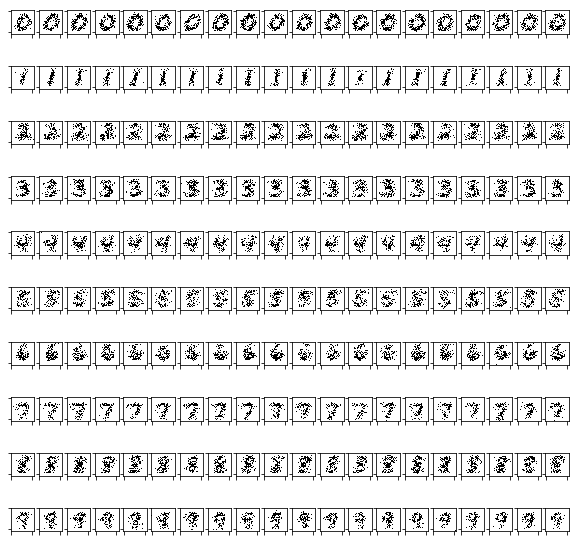

In [26]:
def P10(num_examples):
    p10_bnb = BernoulliNB(binarize=0.5)
    p10_bnb.fit(train_data,train_labels)
    # feature_log_prob_ gives us the log probability of each feature.
    # We should convert the log probability into regular form and store
    feature_prob = np.exp(p10_bnb.feature_log_prob_)
    
    # Create a figure
    figure = plt.figure(figsize=(10,10))

    for num in range(10):
        ax = list()
        for i in range(num_examples):
            feature_vector = np.random.rand(784)
            num_generated = np.where(feature_vector <feature_prob[num],1,0)    
            ax.append(plt.subplot2grid((10,num_examples),(num,i),rowspan=1,colspan=1))
            grid_data = num_generated.reshape(28,28)
            ax[i].imshow(grid_data,interpolation="none",cmap="binary")
            ax[i].set_xticklabels([])
            ax[i].set_yticklabels([])
    plt.show()

P10(20)

<font color=blue> ANSWER: The generated numbers are similar to the training set, although they do not have same clarity compared to training.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [55]:
def P11(buckets, correct, total):
    p11_bnb = BernoulliNB(binarize=0.5,alpha=0.001)
    p11_bnb.fit(train_data,train_labels)
    p11_pred = p11_bnb.predict(dev_data)
    # Find the predicted probabilities. 
    # The below takes each element of dev_data and stores probabilities for each label.
    # The label that has the max probability is choosen by the classifier
    predicted_probs = p11_bnb.predict_proba(dev_data)
    # Now let us iterate over all the dev data and find what was the max probability that classifier picked
    max_probs = np.array([max(predicted_probs[i]) for i in range(len(dev_data))])
    # Now let us build prediction matrix
    pred_values = np.array(p11_pred==dev_labels)
    
    # Loop through each bucket and calculate correct and total
    for i in range(len(buckets)):
        # Pick the entries where max_probs are higher than bucket threshold
        entries_higher = max_probs > buckets[i]
        total[i] = sum(entries_higher)
        correct[i] = sum(pred_values[entries_higher]==1)
        print("Total for bucket {} is {} and correct is {}".format(i,total[i],correct[i]))

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))



Total for bucket 0 is 997 and correct is 849
Total for bucket 1 is 955 and correct is 825
Total for bucket 2 is 860 and correct is 778
Total for bucket 3 is 784 and correct is 729
Total for bucket 4 is 722 and correct is 685
Total for bucket 5 is 651 and correct is 623
Total for bucket 6 is 576 and correct is 556
Total for bucket 7 is 495 and correct is 481
Total for bucket 8 is 0 and correct is 0
p(pred) <= 0.5000000000000    total = 997    accuracy = 0.852
p(pred) <= 0.9000000000000    total = 955    accuracy = 0.864
p(pred) <= 0.9990000000000    total = 860    accuracy = 0.905
p(pred) <= 0.9999900000000    total = 784    accuracy = 0.930
p(pred) <= 0.9999999000000    total = 722    accuracy = 0.949
p(pred) <= 0.9999999990000    total = 651    accuracy = 0.957
p(pred) <= 0.9999999999900    total = 576    accuracy = 0.965
p(pred) <= 0.9999999999999    total = 495    accuracy = 0.972
p(pred) <= 1.0000000000000    total =   0    accuracy = 0.000


<font color=blue> ANSWER: The accuracy is better with higher posterior probabilities than the lower ones. However, the model is not very well caliberated as the accuracy does not match the posterior probabilities

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()